In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14,
                     'xtick.labelsize': 14})

$$\text{MSE}$$

In [2]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

$$\text{Gradient}$$

In [3]:
def grad(X, w, y):
    n = len(y)
    return 2/n * X.T@(X@w - y)

$$\text{GD}$$

In [46]:
def GD(eta, iteration, X, y, diff):    
    np.random.seed(42)
    w = np.random.randn(X.shape[1]) # начальное приближение весов
    errs = []
    
    #calculation first mse
    mse_old = calc_mse(y, X@w)
    errs.append(mse_old)
    
    #calculation second mse
    w -= eta*grad(X, w, y)
    mse_new = calc_mse(y, X@w)
    errs.append(mse_new)
    
    while abs(mse_new - mse_old) > diff and iteration -2 > 0:
        
        w -= eta*grad(X, w, y)
        y_pred = X@w
        
        mse_old = mse_new
        mse_new = calc_mse(y, y_pred)
        errs.append(mse_new)      
        iteration -= 1
    return w, errs

$$\text{GD with varying LR}$$

In [5]:
def grad_descent_var_lr(eta_start, iteration, X, y, diff):
    w_old = np.array([0.5, 0.5])
    errs = []
    
    #calc first mse
    mse_old = calc_mse(y, X@w_old)
    errs.append(mse_old)
    
    #calc second mse
    w_new = w_old - eta_start*grad(X, w_old, y)
    mse_new = calc_mse(y, X@w_new)
    errs.append(mse_new)
    
    iteration -= 1
    
    #gradient descent
    while abs(mse_new - mse_old) > diff and iteration > 0:
        delta = 1
        grad_sq_norm = np.linalg.norm(grad(X, w_old, y), ord=2)
        while mse_new > mse_old - delta*eta_start*grad_sq_norm:
            delta /= 2
        eta = delta*eta_start
        
        w_old = w_new
        w_new -= eta*grad(X, w_new, y)
        
        mse_old = mse_new
        mse_new = calc_mse(y, X@w_new)
        errs.append(mse_new)
        
        iteration -= 1
    
    return w_new, errs  

$$\text{Stochastic GD}$$

In [6]:
# SGD - стохастический градиентный спуск
def stochastic_GD(X, y, iterations, eta):
    np.random.seed(42)
    w = np.random.randn(X.shape[1]) # начальное приближение весов
    n = X.shape[0] # число наблюдений
    errs = np.zeros(iterations)
    for i in range(iterations):
        errs[i] = calc_mse(y, np.dot(X, w))
        # генерируем случайный индекс объекта выборки
        idx = np.random.randint(n)
        y_pred = np.dot(X[idx], w)
        w -= eta * (2 * np.dot(X[idx].T, (y_pred - y[idx])))
    return w, errs

$$\text{Stochastic GD, iterations to match}$$

In [13]:
# поиск количества итераций до совпадения mse_from_GD с разницей не больше delta
def stochastic_GD_iter_to_close(X, y, eta, mse_from_GD, delta):
    np.random.seed(42)
    w = np.random.randn(X.shape[1]) # начальное приближение весов
    n = X.shape[0] # число наблюдений
    errs = []
    errs.append(calc_mse(y, X@w))
    while abs(mse_from_GD - errs[-1]) > delta:
        idx = np.random.randint(n)
        y_pred = np.dot(X[idx], w)
        w -= eta * (2 * np.dot(X[idx].T, (y_pred - y[idx])))
        errs.append(calc_mse(y, X@w))
    return w, errs

$$\text{Origin GD with L-2 regularization}$$

In [8]:
def eval_model_reg2(X, y, iterations, eta=1e-4, lambda_=1e-8, verbose=False):
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations + 1):
        y_pred = np.dot(X, w)
        err = calc_mse(y, y_pred)
        w -= eta * (1/n * 2 * np.dot(X.T, (y_pred - y)) + 2 * lambda_ * w)
        if verbose and i % (iterations / 10) == 0:
            print(f'{i}: weights={w}, MSE={err:.3f}')
    return w

$$\text{Origin GD with L-1 regularization}$$

In [142]:
def eval_model_reg1(X, y, iterations, eta=1e-4, lambda_=1e-8, verbose=False):
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations + 1):
        y_pred = np.dot(X, w)
        err = calc_mse(y, y_pred)        
        w -= eta * (1/n * 2 * np.dot(X.T, (y_pred - y)) + lambda_ * np.sign(w))
        if verbose and i % (iterations / 10) == 0:
            print(f'{i}: weights={w}, MSE={err:.3f}')
    return w

### <b> Task №1

In [9]:
X_, y_, coef = datasets.make_regression(n_samples=1000, 
                                      n_features=2, 
                                      n_informative=2, 
                                      n_targets=1,
                                      noise=5, 
                                      coef=True, 
                                      random_state=42)

In [9]:
etas = [1e-2, 1e-3, 1e-4]
iterations = [500, 1000, 5000, 10000]
colors = ['#FF1493', '#00FF00']

diff = 1e-6

n, m = len(etas), len(iterations)

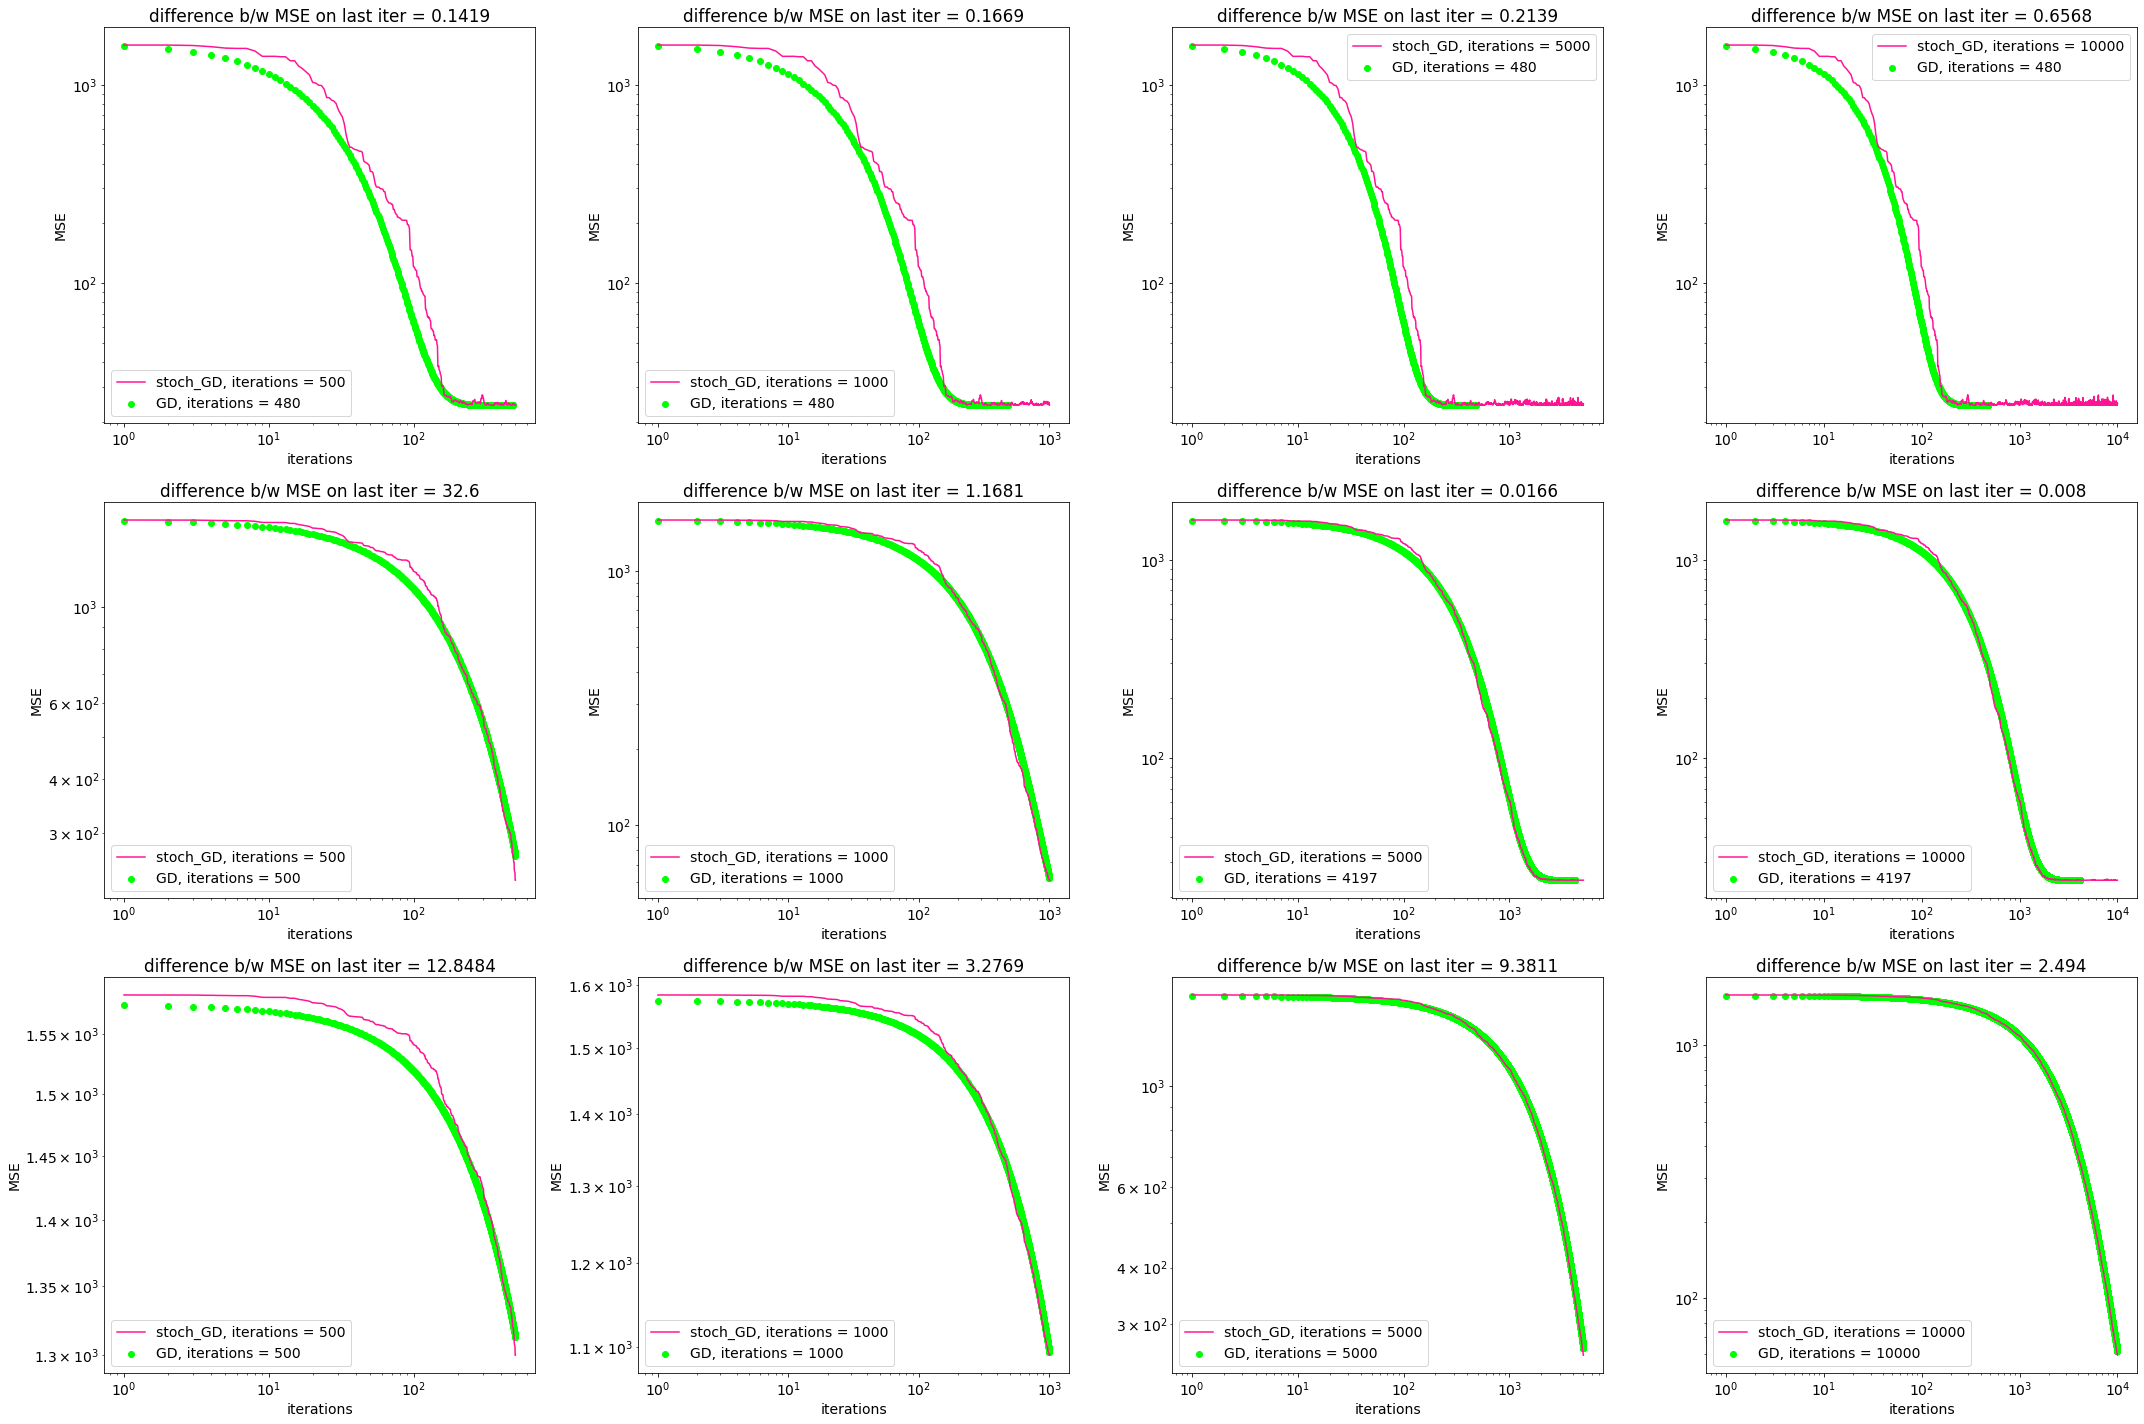

In [14]:
fig, ax = plt.subplots(n, m, figsize = (30, 20))
for i in range(n):
    for j in range(m):
        w_st, err_st = stochastic_GD(X_, y_, iterations[j], etas[i])
        w_or, err_or = GD(etas[i], iterations[j], X_, y_, diff)
        ax[i, j].plot(np.arange(1, len(err_st)+1), err_st, color = colors[0], label = f'stoch_GD, iterations = {len(err_st)}')
        ax[i, j].scatter(np.arange(1, len(err_or)+1), err_or, color = colors[1], label = f'GD, iterations = {len(err_or)}')
        ax[i, j].set_xlabel('iterations')
        ax[i, j].set_ylabel('MSE')
        ax[i, j].set_xscale('log')
        ax[i, j].set_yscale('log')
        ax[i, j].set_title(f'difference b/w MSE on last iter = {abs(round(err_st[-1] - err_or[-1], 4))}')
        ax[i, j].legend()        
plt.tight_layout()

* По этим графикам трудно судить о скорости сходимости, т.к. неясно сколько потребуется итераций, чтобы стохастический $GD$ сошелся по $MSE$ к классическому $GD$. Проведем еще одно исследование: сначала запустим классический градиентный спуск, получим оценки весов и ошибку с последней итерации. Далее будем делать шаг стохастического градиентного спуска до тех пор, пока разница среднеквадратичной ошибки с текущего  шага и с последней итерации $GD$ не станет меньше заданной $\delta$.

In [65]:
etas = [1e-2, 1e-3]
deltas = [1e-4, 1e-5, 1e-6, 1e-7]
iteration = 20000
colors = ['#FF1493', '#00FF00']

diff = 1e-6

n, m = len(etas), len(deltas)

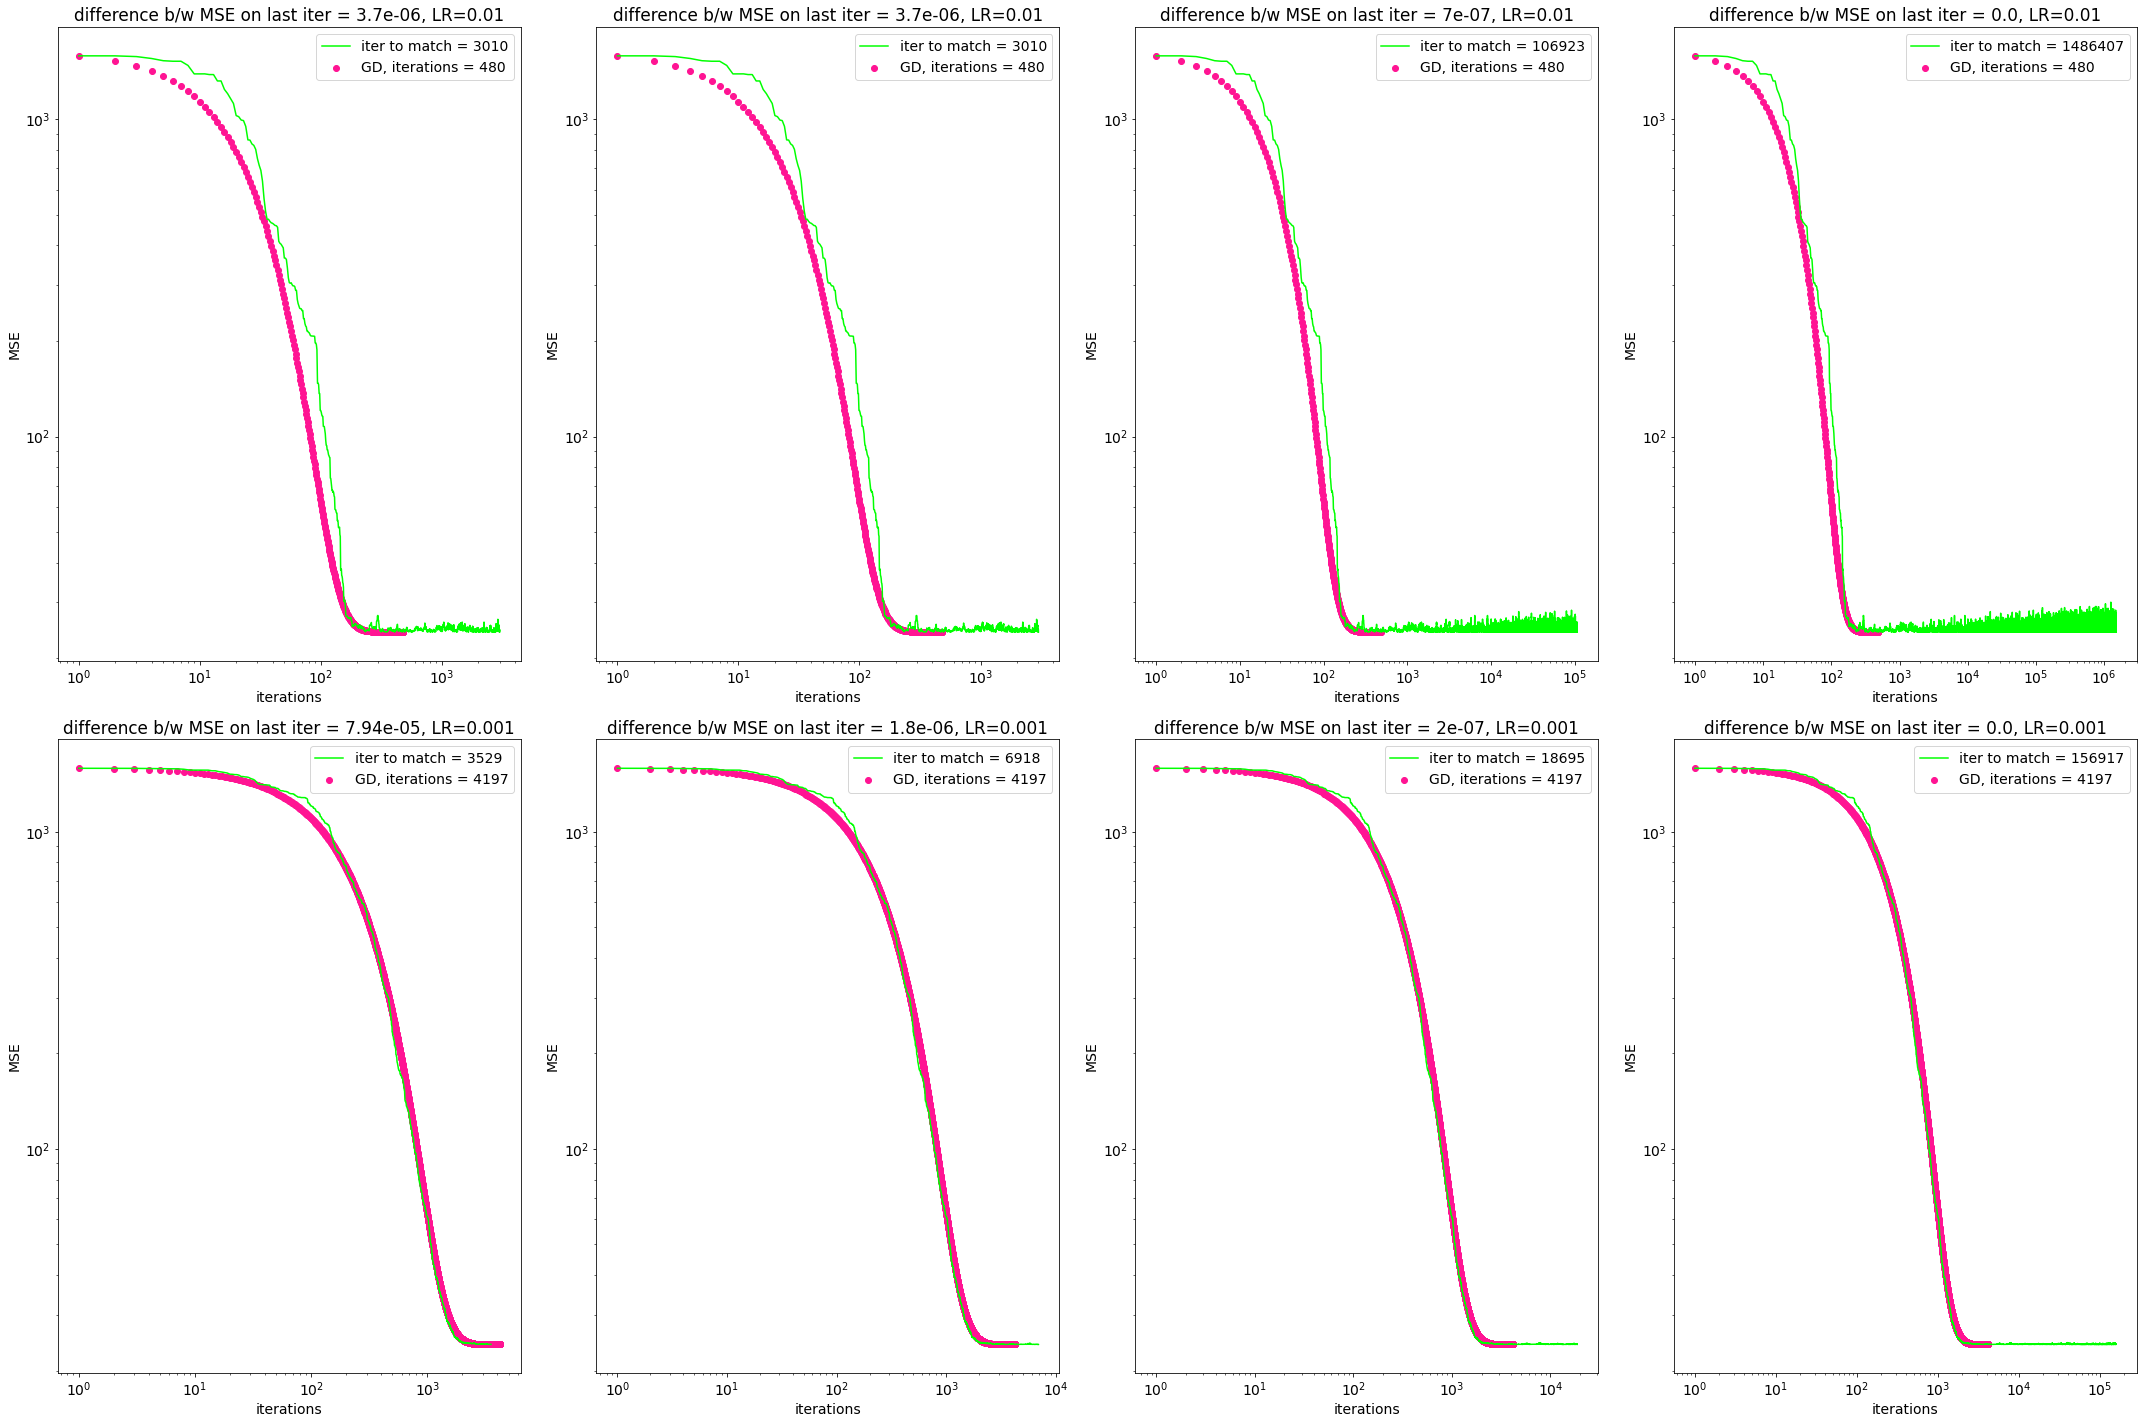

In [66]:
fig, ax = plt.subplots(n, m, figsize = (30, 20))
for i in range(n):
    for j in range(m):   
            w_or, err_or = GD(etas[i], iteration, X_, y_, diff)
            w_it, err_it = stochastic_GD_iter_to_close(X_, y_, etas[i], err_or[-1], deltas[j])
            ax[i, j].scatter(np.arange(1, len(err_or)+1), err_or, color = colors[0], label = f'GD, iterations = {len(err_or)}')
            ax[i, j].plot(np.arange(1, len(err_it)+1), err_it, color = colors[1], label = f'iter to match = {len(err_it)}')
            ax[i, j].set_xlabel('iterations')
            ax[i, j].set_ylabel('MSE')
            ax[i, j].set_xscale('log')
            ax[i, j].set_yscale('log')
            ax[i, j].set_title(f'difference b/w MSE on last iter = {abs(round(err_or[-1] - err_it[-1], 7))}, LR={etas[i]}')
            ax[i, j].legend()        
plt.tight_layout()

__1__. При слишком малом или слишком большом $LR$ алгоритм стохастического градиентного спуска крайне нестабилен, но только в ситуациях, когда мы оказываемся на "дне" нашей функции потерь, минимум которой ищем. Наверное, стоит использовать модификацию стохастического $GD$, заключающуюся в вариации $LR$.

__2__. Оптимальный $LR$ для градиентного спуска не совпадает со стохастическим. Например при $LR = 0.1$ простой $GD$ сошелся по $MSE$ в 6-м знаке уже за 51 итерацию, в то время как чтобы стохастический сошелся к такой же ошибке, потребовалось почти в $10^5$ больше итераций. Если параметр $LR$ подобран не оптимально, то для того чтобы $MSE$, полученная в $GD$, совпадала в следующем знаке $MSE$ стохастического $GD$, нужно примерно на 1 порядок больше итераций. Оптимальным значением $LR$ для стохастического спуска оказалось $10^{-3}$. Рост числа итераций при оптимальном значении был приблизительно равен $2^x \lt 10^x$, $x$ — количество знаков после запятой.

__3__. Исследование для $LR = 10^{-4}$ провести не удалось.

### <b> Task №2

In [82]:
n = 3
X_, y_, coef = datasets.make_regression(n_samples=1000, 
                                      n_features=n, 
                                      n_informative=n, 
                                      n_targets=1,
                                      noise=5, 
                                      coef=True, 
                                      random_state=42)

In [128]:
w_list_reg1 = []
w_list_reg2 = []
l_list = []
error_list_reg1 = []
error_list_reg2 = []

for l in np.logspace(start = -4, stop = 1, num = 20):
    l_list.append(l)
    
    w_reg1 = eval_model_reg1(X_, y_, iterations = 1000, eta=1e-2, lambda_ = l)
    w_reg2 = eval_model_reg2(X_, y_, iterations = 1000, eta=1e-2, lambda_ = l)
    
    w_list_reg1.append(w_reg1)
    w_list_reg2.append(w_reg2)
    
    error_list_reg1.append(calc_mse(y_, X_@w_reg1))
    error_list_reg2.append(calc_mse(y_, X_@w_reg2))

weights_reg1 = np.array(w_list_reg1)
weights_reg2 = np.array(w_list_reg2)

errs_reg1 = np.array(error_list_reg1)
errs_reg2 = np.array(error_list_reg2)    

In [131]:
w_mnk = np.linalg.inv(X_.T@X_)@X_.T@y_

In [132]:
w_mnk

array([98.37895936, 82.31254245, 25.94751552])

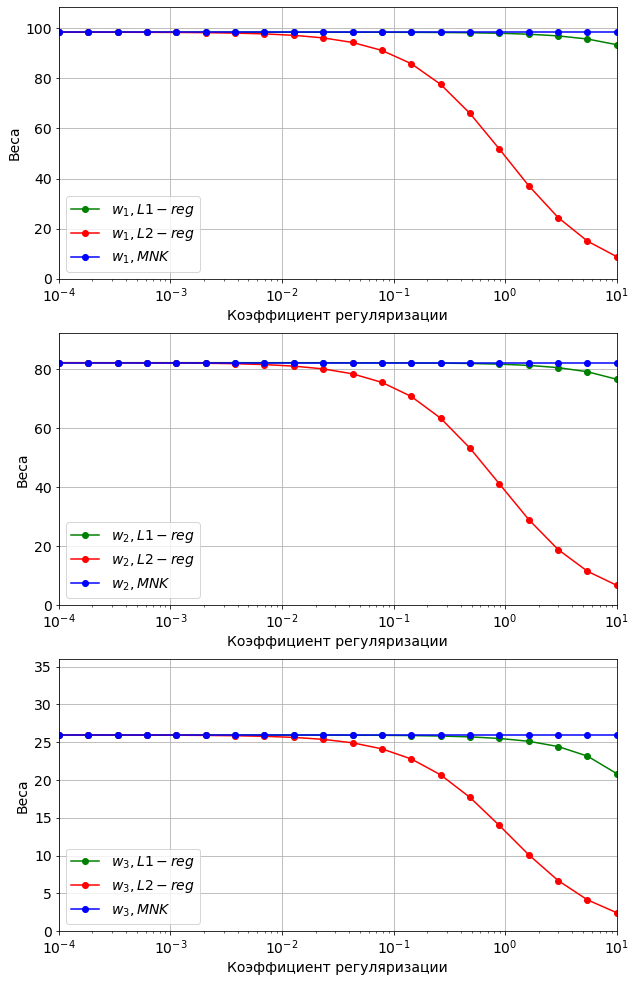

In [139]:
fig, ax = plt.subplots(nrows = n, figsize=(10, 17))
ax = ax.ravel()

for i in range(n):
    ax[i].plot(l_list, weights_reg1[:, i], 'go-', label=fr'$w_{i+1}, L1-reg$')
    ax[i].plot(l_list, weights_reg2[:, i], 'ro-', label=fr'$w_{i+1}, L2-reg$')
    ax[i].plot(l_list, len(l_list)*[w_mnk[i]], 'bo-', label=fr'$w_{i+1}, MNK$')
    ax[i].set_xlabel('Коэффициент регуляризации')
    ax[i].set_ylabel('Веса')   
    ax[i].set_xscale('log')
    ax[i].grid()
    ax[i].legend()
    ax[i].set(xlim=(l_list[0], l_list[-1]), ylim=(0, w_mnk[i]+10))

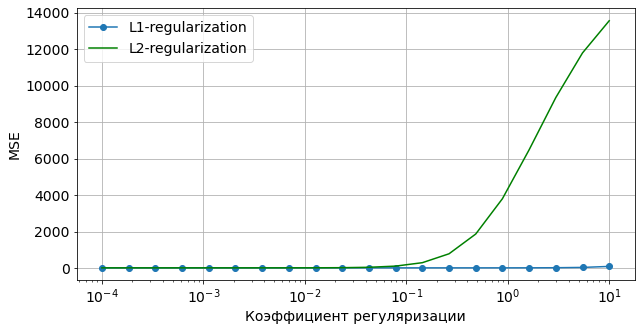

In [141]:
plt.figure(figsize=(10, 5))
plt.xscale('log')
plt.plot(l_list, errs_reg1, 'o-', label = 'L1-regularization')
plt.plot(l_list, errs_reg2, 'g-', label = 'L2-regularization')
plt.xlabel('Коэффициент регуляризации')
plt.ylabel('MSE')
plt.legend()
plt.grid()

* $L1$-регуляризация менее склонна к изменению коэффициентов и $MSE$, в то время как $L2$-регулязризация, когда параметр регуляризации изменяется в интервале $[10^{-2}; 1]$, начинает сильно штрафовать, т.е. часть изменение целевой переменной объясняется "большими" коэффициентами модели, что приводит к уменьшению весов и росту $MSE$.